## Convert csv to json

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import csv
import json


# Function to convert a CSV to JSON
# Takes the file paths as arguments
def make_json(csvFilePath, jsonFilePath):
	
	# create a dictionary
	data = {}
	
	# Open a csv reader called DictReader
	with open(csvFilePath, encoding='utf-8') as csvf:
		csvReader = csv.DictReader(csvf)
		
		# Convert each row into a dictionary
		# and add it to data
		for rows in csvReader:
			
			# Assuming a column named 'No' to
			# be the primary key
			key = rows['MsgID']
			data[key] = rows

	# Open a json writer, and use the json.dumps()
	# function to dump data
	with open(jsonFilePath, 'w', encoding='utf-8') as jsonf:
		jsonf.write(json.dumps(data, indent=4))
		
# Driver Code

# Decide the two file paths according to your
# computer system
csvFilePath = r'/content/drive/MyDrive/CIS509/datasummary.csv'
jsonFilePath = r'/content/drive/MyDrive/CIS509/datasummary.json'

# Call the make_json function
make_json(csvFilePath, jsonFilePath)


## Statistics

In [ ]:
!pip install -U spacy
!python -m spacy download en_core_web_lg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2023-04-26 07:18:07.925188: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 3.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
# import required packages

import json
import spacy
import numpy as np

# load the Spacy language model
nlp = spacy.load("en_core_web_lg")

# a default list of stop words set by the Spacy language model
stopwords = nlp.Defaults.stop_words
print(stopwords)


# variables to store term statistics
num_of_comments = 0
unique_word = set() # using the set-type variable since it does not allow duplicates > able to count the number of unique words
num_of_token_per_comment = [] # using the list-type varailbe since we want to measure corpus-level statistics (e.g., avg, max, min, median, etc.)
num_of_token_per_comment_without_stop_words = []
total_number_of_tokens = 0 # in a corpus
unique_author = set() # using the set-type variable since it does not allow duplicates > able to count the number of unique authors
time_stamp_list = [] # able to measure the number of comments by day, week, etc.
reply_count = 0
unique_submission = set() # using the set-type variable since it does not allow duplicates > able to count the number of unique submissions

# data processing
with open("/content/drive/MyDrive/CIS509/datasummary.json", "r") as file: # Need to first covert the csv store data to be a json file
    f = json.loads(file.read())
    for line in f: # for each data point, do the following
        line_data = f[line]
        text = line_data["MsgBody"]
        doc = nlp(text)
        num_of_comments += 1
		# statistics regarding words
        num_of_tokens = len(doc)
        total_number_of_tokens += num_of_tokens
        token_count_without_stop_words = 0
        for token in doc:
            if token.is_stop is True: # check whether the provided token is a stop word and decide whether to disregard it
                pass
            else:
                unique_word.add(str(token).lower())
                token_count_without_stop_words += 1
        num_of_token_per_comment.append(num_of_tokens)
        num_of_token_per_comment_without_stop_words.append(token_count_without_stop_words)
		# statistics regarding authors
        author_name = line_data["Author"]
        unique_author.add(author_name.lower())
		# statistics regarding time_stamp
        time_stamp = line_data["Timestamp"]
        time_stamp_list.append(time_stamp)
		# statistics regarding replies
        reply_to = line_data["ReplyTo"]
        if reply_to == "-":
            pass
        else:
            reply_count += 1
		# statistics regarding submissions
        thread_id = line_data["ThreadID"]
        unique_submission.add(thread_id)

# statistics
print("number of comments:", num_of_comments)
print("number of unique words:", len(unique_word))
print("total number of words in the corpus:", total_number_of_tokens)
print("average number of words in comments:", np.mean(np.asarray(num_of_token_per_comment)))
print("average number of words in comments without stop words:", np.mean(np.asarray(num_of_token_per_comment_without_stop_words)))
print("maximum number of words in comments:", np.max(np.asarray(num_of_token_per_comment)))
print("maximum number of words in comments without stop words:", np.max(np.asarray(num_of_token_per_comment_without_stop_words)))
print("minimum number of words in comments:", np.min(np.asarray(num_of_token_per_comment)))
print("minimum number of words in comments without stop words:", np.min(np.asarray(num_of_token_per_comment_without_stop_words)))
print("median number of words in comments:", np.median(np.asarray(num_of_token_per_comment)))
print("median number of words in comments without stop words:", np.median(np.asarray(num_of_token_per_comment_without_stop_words)))
print("number of unique authors:", len(unique_author))
print("number of comments replying to other comments:", reply_count)
print("number of sumbissions:", len(unique_submission))


{'i', 'this', 'six', '‘d', '‘ve', 'since', 'own', 'upon', 'no', 'whom', 'meanwhile', 'into', 'serious', 'now', '‘re', 'themselves', 'beforehand', 'we', 'how', 'among', 'another', 'did', 'on', 'same', 'yourselves', 'n‘t', 'was', 'first', 'its', 'beside', 'sometimes', 'made', 'in', 'twenty', 'about', 'your', 'few', 'else', 'quite', 'than', 'except', 'front', 'therein', 're', 'fifteen', 'noone', 'thus', 'it', 'those', 'say', 'had', 'third', 'herein', 'you', 'itself', 'what', 'several', 'others', 'go', 'forty', 'elsewhere', 'various', 'become', 'used', 'wherever', 'over', 'seem', 'behind', 'an', 'she', 'could', 'and', 'thereafter', 'indeed', 'anyone', 'but', 'throughout', 'himself', 'latter', 'around', 'part', 'enough', '‘m', 'already', 'very', '‘ll', 'eleven', 'otherwise', 'my', 'is', 'seems', 'herself', 'somehow', 'whether', "'ve", 'yourself', 'her', 'put', 'toward', 'amongst', 'towards', 'our', 'he', 'regarding', 'against', 'whereas', 'sometime', 'often', 'name', 'rather', 'therefore', 

## Coherence

In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models
import spacy
import json

from gensim import corpora
from gensim import models

import spacy.cli; 
spacy.cli.download("en_core_web_lg"); 

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RuntimeError: ignored

ImportError: ignored

#### Documents without preprocessing

In [ ]:
nlp = spacy.load("en_core_web_lg")

documents = []

with open("datasummary.json", "r") as file: 
    f = json.loads(file.read())
    for line in f: # for each data point, do the following
        line_data = f[line]
        documents.append(line_data["MsgBody"])

processed_documents = [] # list for storing tokenized documents
for document in documents: 
    temp_list = [] # list for storing tokens in a document
    for token in nlp(document):
        temp_list.append(str(token))
    processed_documents.append(temp_list) 
dictionary = corpora.Dictionary(processed_documents) # index words with integers
corpus = [dictionary.doc2bow(document) for document in processed_documents] # TF representation
tfidf = models.TfidfModel(corpus) # Fit TF-IDF
corpus_tfidf = tfidf[corpus] # Transform "corpus" into TF-IDF

In [ ]:
#print(dictionary)
#print(corpus[0])
print(corpus_tfidf[2])

[(1, 0.02969403817496186), (5, 0.04246772448647892), (14, 0.1351697366859993), (19, 0.028856134839491593), (24, 0.06432381362187417), (61, 0.22717741299072527), (70, 0.14150273573893524), (79, 0.15745922083099864), (80, 0.30080986744381943), (81, 0.20190253608787556), (82, 0.11183139556772172), (83, 0.32447578077490435), (84, 0.3893761035750428), (85, 0.30199774909689464), (86, 0.19266623434894994), (87, 0.27729039316196713), (88, 0.10713818331729874), (89, 0.2280033875783389), (90, 0.09032747749638405), (91, 0.14581250957598416), (92, 0.19848797184855402), (93, 0.3526782502360587), (94, 0.12294359757585797)]


#### Documents with preprocessing

In [ ]:
nlp = spacy.load("en_core_web_lg")

documents = []

with open("datasummary.json", "r") as file: 
    f = json.loads(file.read())
    for line in f: # for each data point, do the following
        line_data = f[line]
#for line in open("datasummary.json", "r"):
        text = line_data["MsgBody"]
        doc = nlp(text)
        if len(doc) <= 5: # exclude comments with five or less than five words
            pass
        else:
          documents.append(text.replace("!","").replace(".","").replace("?","").replace("[","").replace("]","").replace(")","").replace("(","").replace("  "," ").replace('\"'," ").replace("\'"," ").replace("/"," ").replace("\\"," "))

processed_documents = [] # list for storing tokenized documents
for document in documents: 
    temp_list = [] # list for storing tokens in a document
    for token in nlp(document):
        if token.is_stop is True: # check whether the provided token is a stop word and decide whether to disregard it
            pass
        elif not nlp.vocab.has_vector(str(token)): # check whether the provided token is in a vocabulary
            pass
        else:
            temp_list.append(str(token.lemma_)) # lemmatize
    processed_documents.append(temp_list) 
dictionary = corpora.Dictionary(processed_documents) # index words with integers
corpus = [dictionary.doc2bow(sentence) for sentence in processed_documents] # TF representation
tfidf = models.TfidfModel(corpus) # Fit TF-IDF
corpus_tfidf = tfidf[corpus] # Transform "corpus" into TF-IDF

In [ ]:
print(corpus_tfidf[4])

[(36, 0.24600721283519505), (53, 0.21849868275641943), (54, 0.1523383051949224), (55, 0.34580233795268767), (56, 0.22327767886414054), (57, 0.23059095754767814), (58, 0.4811763564620892), (59, 0.24507343888870498), (60, 0.198572985488341), (61, 0.29729781626606616), (62, 0.3802745200970537), (63, 0.28619895160117664)]


In [ ]:
lda_model = models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=8) # train LDA model

In [ ]:
for topic in lda_model.show_topics(num_topics= 10, num_words=5):# show 5 most important words for each topic
    print(topic)

print(corpus_tfidf[0])
for topic_proportion in lda_model[corpus_tfidf[0]]: # show topic distribution for the first document in the corpus
    print(topic_proportion)
for doc, topic_dist in zip(documents, lda_model[corpus_tfidf]): # print out topic distribution for each document in the corpus
    print(doc, ": ", topic_dist)
    break

(25, '0.036*"onion" + 0.025*"combo" + 0.019*"care" + 0.019*"charge" + 0.017*"fry"')
(7, '0.027*"calorie" + 0.022*"machine" + 0.021*"count" + 0.021*"job" + 0.020*"restaurant"')
(24, '0.025*"tire" + 0.015*"price" + 0.014*"like" + 0.014*"sound" + 0.013*"$"')
(13, '0.022*"meat" + 0.016*"real" + 0.015*"op" + 0.014*"package" + 0.013*"exactly"')
(0, '0.063*"thank" + 0.033*"egg" + 0.027*"know" + 0.025*"amazing" + 0.023*"executive"')
(8, '0.019*"service" + 0.014*"option" + 0.014*"customer" + 0.014*"manager" + 0.013*"tell"')
(27, '0.031*"Kirkland" + 0.030*"chocolate" + 0.022*"brand" + 0.017*"one" + 0.017*"oil"')
(2, '0.053*"dog" + 0.030*"hot" + 0.026*"chicken" + 0.022*"cheese" + 0.015*"rotisserie"')
(3, '0.024*"center" + 0.023*"taste" + 0.020*"yeah" + 0.020*"way" + 0.018*"hear"')
(23, '0.036*"cat" + 0.034*"wow" + 0.033*"absolutely" + 0.026*"idea" + 0.021*"cook"')
[(0, 0.48835446621000783), (1, 0.3144349639453056), (2, 0.4489207748139511), (3, 0.1835256072483311), (4, 0.38723595515816617), (5, 0.

In [ ]:
# Coherence Measures
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_documents, dictionary=dictionary, coherence='c_v') # by changing the values for the "coherence" parameter, you can use different coherence methods (e.g., 'u_mass', 'c_v', 'c_uci', 'c_npmi')
coherence_lda = coherence_model_lda.get_coherence()
print(coherence_lda)

0.4624545039536987


In [ ]:
# Coherence measures over different K
num_of_topics = []
coherence = []
for k in range(29):
    lda_model = models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=k+2) # train LDA model; k+2 because we are only intereseted when K >= 2
    coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_documents, dictionary=dictionary, coherence='c_v') # calculate coherence measures
    coherence_lda = coherence_model_lda.get_coherence()
    num_of_topics.append(k+2)
    coherence.append(coherence_lda)

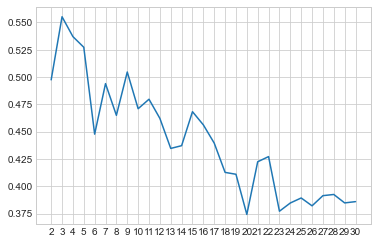

In [ ]:
# Visualizaing coherence measures over different K
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.plot(num_of_topics, coherence) # x-axis = K, y-axis = coherece measures
plt.xticks(num_of_topics) # To label x-axis with K values
plt.show()

## Fit model & Visulization
We fit the LDA model with k=9 because it had a relatively high coherence measure score and a desirable number of topics, which will allow us to have more topics to interpret.

In [ ]:
lda_model = models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=9) # train LDA model

In [ ]:
lda_visualization = pyLDAvis.gensim_models.prepare(lda_model, corpus_tfidf, dictionary)

/Users/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [ ]:
pyLDAvis.display(lda_visualization)


## Topic Interpretation


| No. of Topic| Theme |  
| :-: | :-: |  
| 1 |the experience of shopping at Costco|  
| 2 |the experience of shopping at Costco|  
| 3 |the enjoyment and appreciation of various types of food|  
| 4 |purchasing and preparing food from Costco, particularly meat and meat-based products|  
| 5 |negative experience at Costco|  
| 6 |purchasing and preparing food from Costco|  
| 7 |items or experiences that can be found or purchased at Costco|  
| 8 |the experience of shopping at Costco|  
| 9 |social media (reddit) post|  



## The most interpretable topics and the example documents

# Sentiment Analysis using textBlob and Vader

In [ ]:
import pandas as pd

df=pd.read_csv('/content/drive/MyDrive/CIS509/datasummary.csv')
df.head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,MsgID,Timestamp,Author,ThreadID,ThreadTitle,MsgBody,ReplyTo,Permalink
0,'iwng6fc','2022-11-16 15:54:10','glbltvlr','yx8vdp','Has anyone had issues with the Vornado room h...,'Newer heaters have tip over switches on the b...,'-','/r/Costco/comments/yx8vdp/has_anyone_had_issu...
1,'iwnfx11','2022-11-16 15:52:20','JulioCesarSalad','yx8vdp','Has anyone had issues with the Vornado room h...,'Our furnace is borked and won’t be fixed unti...,'-','/r/Costco/comments/yx8vdp/has_anyone_had_issu...
2,'iwoqsni','2022-11-16 22:16:05','doggz109','yx8vdp','Has anyone had issues with the Vornado room h...,'You likely tripped the breaker running two of...,'-','/r/Costco/comments/yx8vdp/has_anyone_had_issu...
3,'iwnu3xx','2022-11-16 17:40:09','LifelessPolymath53','yx8vdp','Has anyone had issues with the Vornado room h...,'The chance both defective is highly unlikely....,'-','/r/Costco/comments/yx8vdp/has_anyone_had_issu...
4,'iwnmby5','2022-11-16 16:39:49','OCR10','yx8vdp','Has anyone had issues with the Vornado room h...,'I haven’t had a shut off problem but I’ve fou...,'-','/r/Costco/comments/yx8vdp/has_anyone_had_issu...


In [ ]:
df_MsgBody=df['MsgBody']
df_MsgBody.head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    'Newer heaters have tip over switches on the b...
1    'Our furnace is borked and won’t be fixed unti...
2    'You likely tripped the breaker running two of...
3    'The chance both defective is highly unlikely....
4    'I haven’t had a shut off problem but I’ve fou...
Name: MsgBody, dtype: object

## TEXTBLOB

In [ ]:
from textblob import TextBlob

polarityscores=[]
subjectivityscores=[]

for sentence in df_MsgBody[0:10]:
  text=TextBlob(sentence)
  polarityscores.append(text.sentiment[0])
  subjectivityscores.append(text.sentiment[1])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
polarityscores,subjectivityscores

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


([0.5,
  0.3666666666666667,
  -0.15,
  -0.5,
  0.01874999999999999,
  -0.013888888888888895,
  0.125,
  0.2,
  0.05,
  0.0],
 [0.8888888888888888,
  0.5,
  0.75,
  0.5,
  0.74375,
  0.4722222222222222,
  0.575,
  0.2,
  0.30000000000000004,
  0.0])

## VADER


In [ ]:
!pip install vaderSentiment

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.1 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

negscore=[]
posscore=[]
neuscore=[]
compoundscore=[]

for sentence in df_MsgBody[0:10]:
  negscore.append(analyzer.polarity_scores(sentence)['neg'])
  posscore.append(analyzer.polarity_scores(sentence)['pos'])
  neuscore.append(analyzer.polarity_scores(sentence)['neu'])
  compoundscore.append(analyzer.polarity_scores(sentence)['compound'])


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
negscore,posscore,neuscore,compoundscore

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


([0.0, 0.0, 0.0, 0.225, 0.152, 0.153, 0.082, 0.0, 0.0, 0.112],
 [0.091, 0.06, 0.0, 0.155, 0.172, 0.131, 0.121, 0.143, 0.087, 0.224],
 [0.909, 0.94, 1.0, 0.62, 0.676, 0.716, 0.797, 0.857, 0.913, 0.663],
 [0.3182, 0.3818, 0.0, -0.2263, 0.1985, 0.0323, 0.3905, 0.25, 0.2732, 0.296])